# Porfolio 2 Appliance Energy Prediction

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import linear_model, model_selection
from Portfolio2_ext import heatmap
%matplotlib inline

/Users/garylau/anaconda/lib/python3.6/site-packages/sklearn/utils/fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
energy = pd.read_csv('Appliances-energy-prediction-data/energydata_complete.csv', index_col=0)
energy.index = pd.to_datetime(energy.index)

In [3]:
energy.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Data Exploration

In [4]:
energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


- The appliance used an average of 97.69 Wh per 10 mins with a standard deviation 102.52 Wh. 
- The average temperatures and humidities of the rooms are more or less at around 20-21 degrees celcius and 40%.
- The average outdoor temperature is at 7.41 degrees celcius during the experimient, so we can assume there are heater on during the period.

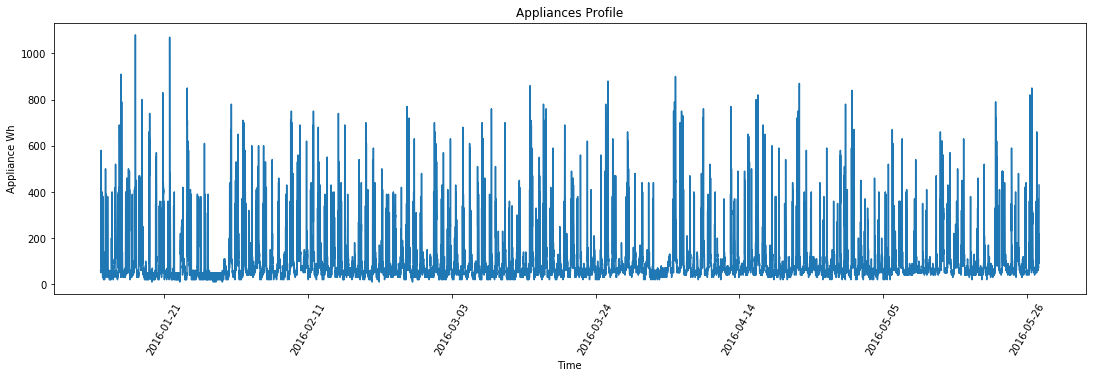

In [5]:
#Plotting Appliances profile
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
app_plot = plt.plot(energy['Appliances'],data=energy)
plt.ylabel('Appliance Wh')
plt.xlabel('Time')
plt.xticks(rotation=60)
plt.title('Appliances Profile')
plt.show()

Above is a plot of the appliances energy use profile during the 4 months data collection period, the line is fairly random so we can assumed there are no cycle or seasonal effect during the period. 

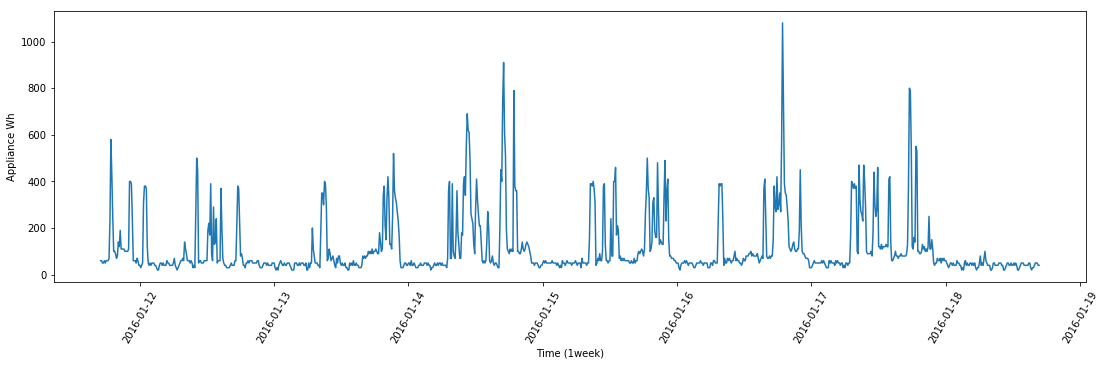

In [6]:
#Plotting Appliances profile for the 1st week
fig = plt.gcf()
fig.set_size_inches(18.5, 5)
plt.plot(energy['Appliances'][0:1007],data=energy)
plt.ylabel('Appliance Wh')
plt.xlabel('Time (1week)')
plt.xticks(rotation=60)
plt.show()

However, when we zoom in to a week(see below), we observed that there are serveral hours throughout the day when the energy use is close to zero. This is because the family is sleeping so they are not using any appliances. Another reason may be the family is out for work or school so no one will be using the any appliances.

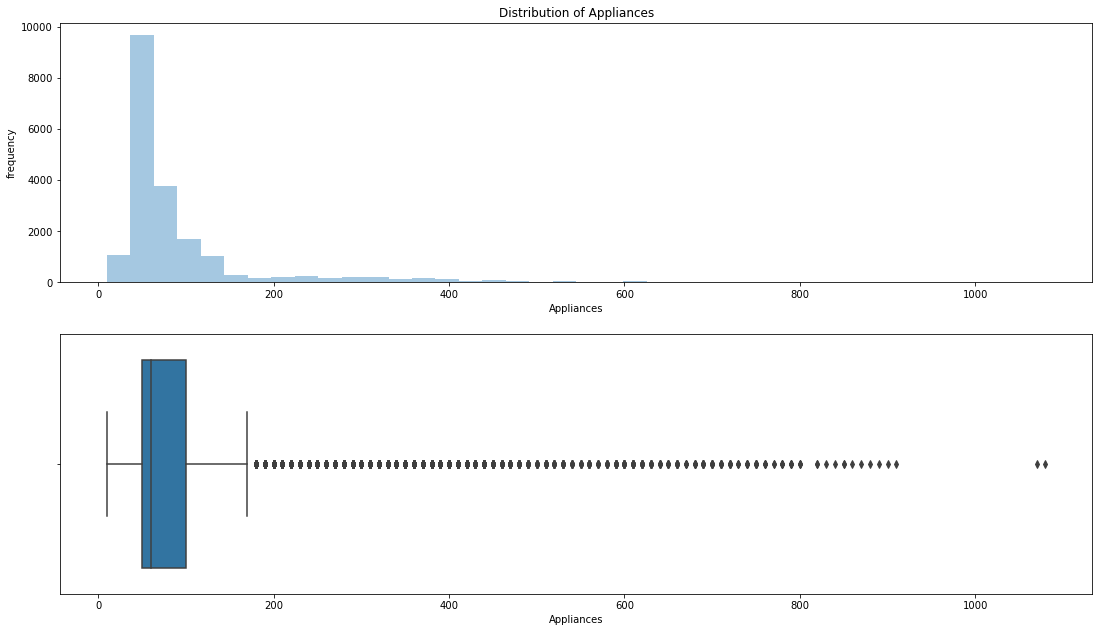

In [7]:
#Distribution of Appliances
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(211)
hist = sns.distplot(energy['Appliances'],kde=False,bins=40)
plt.ylabel('frequency')
plt.title('Distribution of Appliances')
plt.subplot(212)
sns.boxplot(energy['Appliances'])
plt.show()

The histogram and boxplot shows that the distribution of energy used of the appliances is severely right skewed. This is becasue most household appliances do not consume a lot of energy. There are only few occasions when the family use multiple appliances at the same time that will conusme more energy.

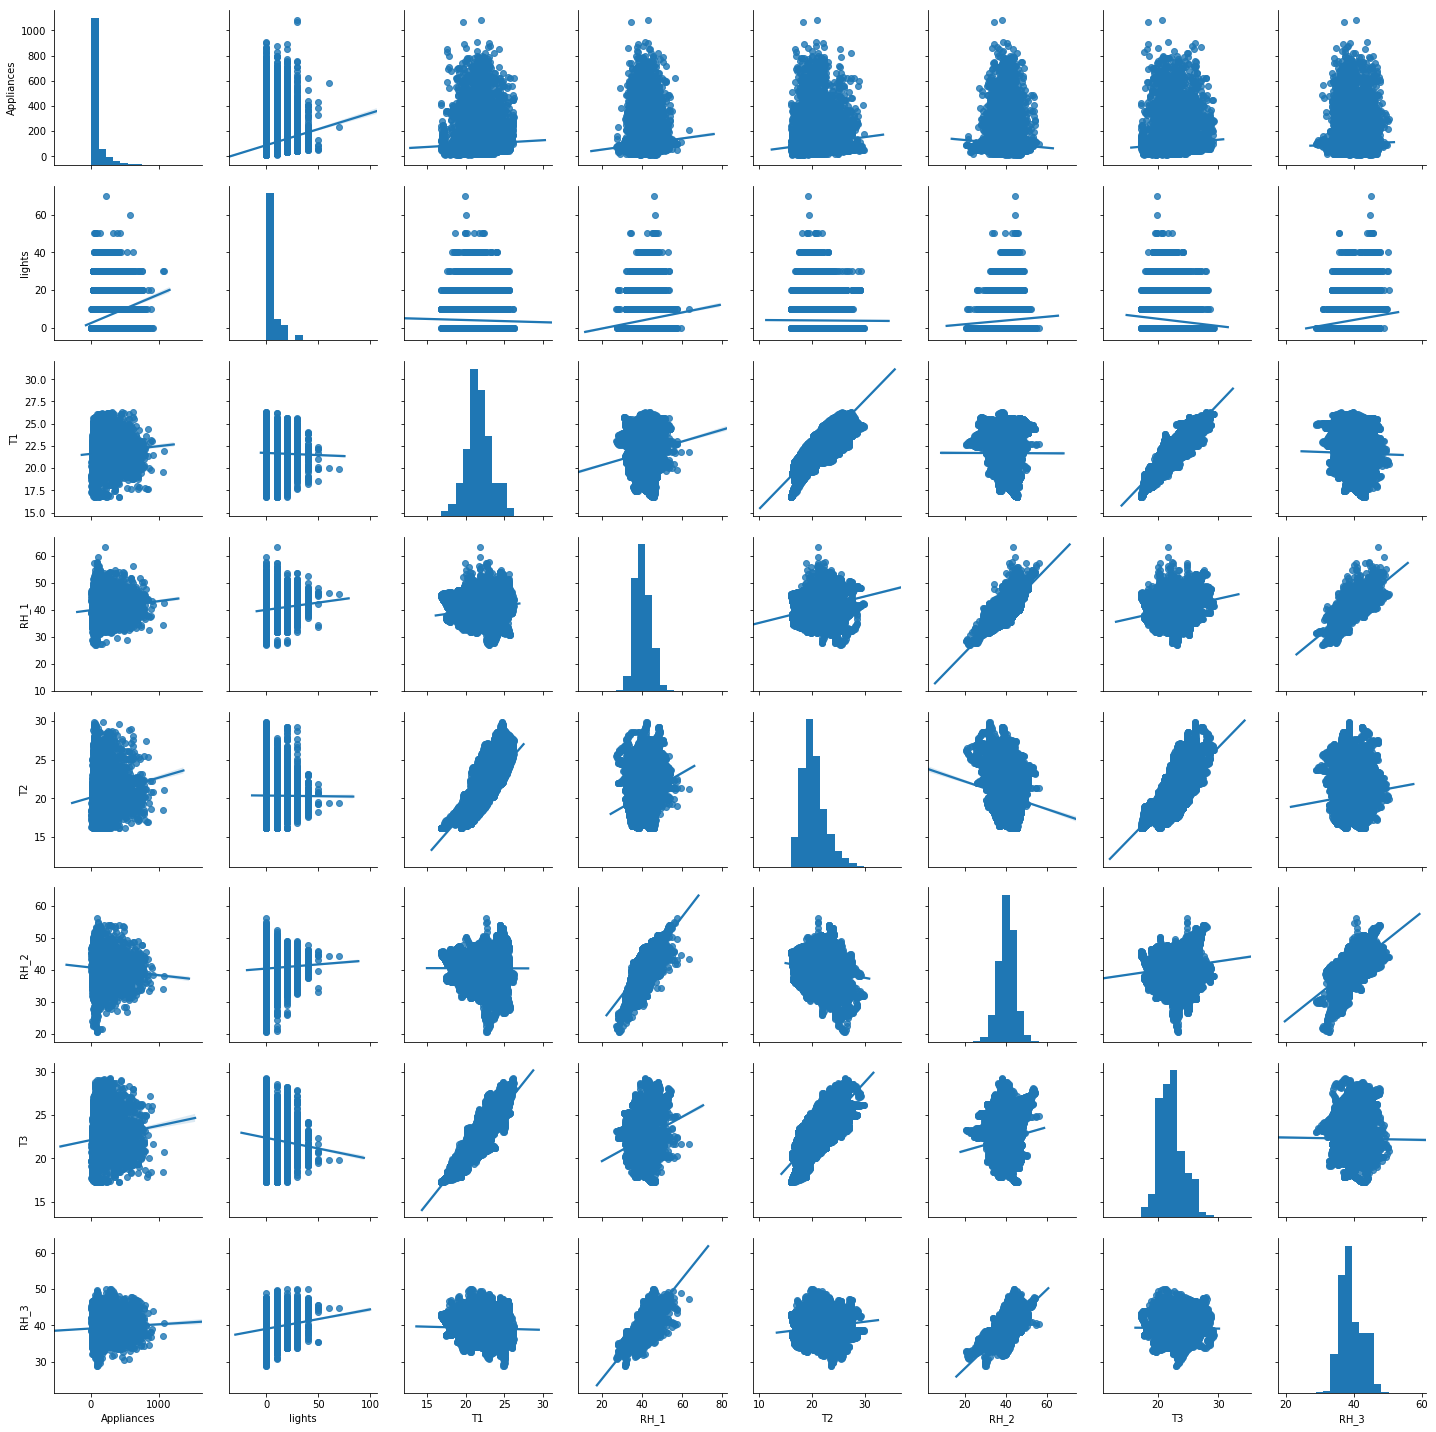

In [8]:
#Scatter Plot Matrix
sns.pairplot(energy[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']],kind='reg')

From the scatter plot matrix, we can see that the temperature of the rooms and outdoor temperature shows strong collinearity. This is normal as the environment temperature always have an impact to indoor temperature unless air conditioning is applied. In this case, there seems no heater or air contition is used. And this is a similar case to humidity.

The strong collinearity between pretictor variables also indicates we should only keep one of these variables as the effect will be duplicated and reduce the model efficiency. A detail correlation matrix is shown below.

In [9]:
var = ['Appliances','lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
      'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
      'Visibility', 'Tdewpoint', 'rv1', 'rv2']

energy_cov = pd.DataFrame(np.corrcoef(np.cov(energy[var],rowvar=False)),index=var,columns=var)
energy_cov

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.904279,0.285304,0.530749,0.521362,-0.483564,0.388300,0.074189,0.210134,-0.040196,...,0.084598,-0.469135,0.415664,-0.347663,-0.560396,0.827961,-0.050143,0.062127,-0.112111,-0.112111
lights,0.904279,1.000000,0.011829,0.605490,0.256976,-0.268130,0.105161,0.287433,-0.057257,0.155773,...,-0.190686,-0.270806,0.141487,-0.368297,-0.313115,0.810684,0.017564,-0.185052,-0.132665,-0.132665
T1,0.285304,0.011829,1.000000,-0.327992,0.957014,-0.811183,0.991173,-0.799631,0.995182,-0.736486,...,0.975154,-0.792778,0.974353,0.024740,-0.903128,0.052556,-0.340331,0.832576,-0.051953,-0.051953
RH_1,0.530749,0.605490,-0.327992,1.000000,-0.125604,0.420047,-0.229223,0.811102,-0.408584,0.799345,...,-0.469237,0.465292,-0.183434,-0.700643,0.203387,0.707937,-0.019435,-0.060122,-0.249756,-0.249756
T2,0.521362,0.256976,0.957014,-0.125604,1.000000,-0.858099,0.971677,-0.660071,0.929275,-0.632838,...,0.871257,-0.805669,0.989999,-0.075576,-0.969959,0.325462,-0.314539,0.755796,-0.083865,-0.083865
RH_2,-0.483564,-0.268130,-0.811183,0.420047,-0.858099,1.000000,-0.804612,0.788528,-0.806132,0.846332,...,-0.734360,0.963915,-0.828660,-0.253893,0.943362,-0.229151,0.144800,-0.378874,-0.070304,-0.070304
T3,0.388300,0.105161,0.991173,-0.229223,0.971677,-0.804612,1.000000,-0.745201,0.977446,-0.691283,...,0.948921,-0.794083,0.978322,-0.036253,-0.912999,0.134424,-0.342819,0.829757,-0.062188,-0.062188
RH_3,0.074189,0.287433,-0.799631,0.811102,-0.660071,0.788528,-0.745201,1.000000,-0.845817,0.976357,...,-0.863863,0.830629,-0.694948,-0.471697,0.690720,0.380138,0.165304,-0.488915,-0.152036,-0.152036
T4,0.210134,-0.057257,0.995182,-0.408584,0.929275,-0.806132,0.977446,-0.845817,1.000000,-0.778880,...,0.988884,-0.796171,0.954213,0.096536,-0.879684,-0.033927,-0.342000,0.821300,-0.024355,-0.024355
RH_4,-0.040196,0.155773,-0.736486,0.799345,-0.632838,0.846332,-0.691283,0.976357,-0.778880,1.000000,...,-0.776301,0.895464,-0.644120,-0.504048,0.706002,0.296985,0.107955,-0.331360,-0.183767,-0.183767


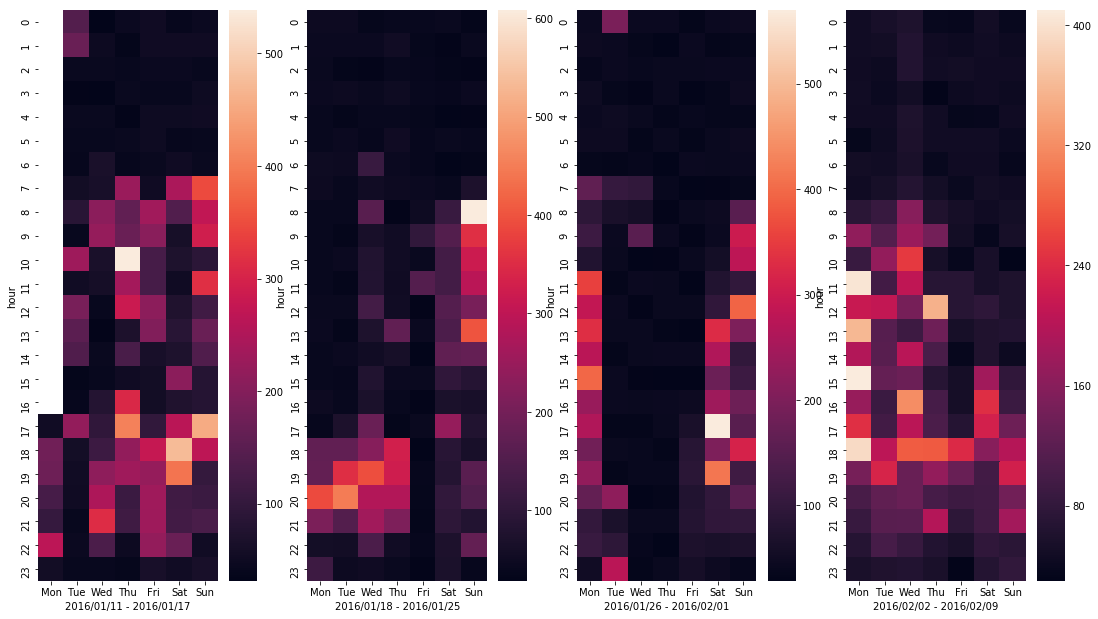

In [10]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.subplot(1,4,1)
heatmap(energy,'Appliances','20160111','20160117')
plt.xlabel('2016/01/11 - 2016/01/17')
plt.subplot(1,4,2)
heatmap(energy,'Appliances','20160118','20160125')
plt.xlabel('2016/01/18 - 2016/01/25')
plt.subplot(1,4,3)
heatmap(energy,'Appliances','20160126','20160201')
plt.xlabel('2016/01/26 - 2016/02/01')
plt.subplot(1,4,4)
heatmap(energy,'Appliances','20160202','20160209')
plt.xlabel('2016/02/02 - 2016/02/09')
plt.show()

The heatmap of the first 4 weeks in above provides further information how the energy usage pattern during a week. We can observe during 0:00 to 06:00 the family used very little energy. This is because everyone is sleeping. 

And as the family members is back at home after 17:00, energy usage is highest than other period of the day.

# Fitting Model

Reproducing the linear model from the paper, we try to fit a full model in the coming session.

In [11]:
#load packages for linear model and calculating R square
model = linear_model.LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error

#Reading the training and testing data from the paper
train = pd.read_csv('Appliances-energy-prediction-data/training.csv')
test = pd.read_csv('Appliances-energy-prediction-data/testing.csv')

In [12]:
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [13]:
#converting WeekStatus to 0=Weekdays, 1=Weekend
weekday_encrypt = pd.Series([0,1],index=['Weekday','Weekend'])
train['WeekStatus'] = train['WeekStatus'].map(weekday_encrypt)
test['WeekStatus'] = test['WeekStatus'].map(weekday_encrypt)

In [14]:
#initialise the variables used in training the model
predictors = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM','WeekStatus']
response = 'Appliances'

In [15]:
#train the full linear regression model
X = train[predictors]
y = train[response]
model.fit(X=X,y=y)
print("y = ", model.coef_, "* x + ", model.intercept_)

y =  [  1.86461679e+00  -4.46091597e+00   1.44907462e+01  -1.79316039e+01
  -1.37050058e+01   2.78815065e+01   5.49166703e+00  -1.41621939e+00
  -6.67796334e-01  -1.60801549e+00   8.86676466e-02   7.37960880e+00
   3.39570392e-01   2.53687821e+00  -1.85047606e+00   7.01027944e+00
  -3.68981117e+00  -1.34024918e+01  -4.37745160e-01  -1.05256219e+01
   1.67528904e-01  -9.76684794e-01   1.71012995e+00   1.63817779e-01
   4.51418909e+00  -2.54488380e-02  -2.54488380e-02   2.96705995e-04
   8.90185577e+00] * x +  -25.3271833004


The above is the model shows us the additive relations with the predictors and the appliance energy use. 
For example, a unit increace of energy use on light increase 1.86 of appliance energy use.

Next, we evaluate the performance of model.

In [16]:
#create prediction value from the test data
X_test = test[predictors]
y_test = test[response]
predicted = model.predict(X_test)

In [17]:
#evaluate the performance of the model
print("The evaluation of the full model")
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

The evaluation of the full model
MSE: 8755.49387356
R^2: 0.151873193004


The $R^2$ is 0.15 which means 15% of the data is explained by this model which is not a very good performance. We further look into the residual plots and Normal Quantile-Quantile plot to check the assumption of a linear regression.

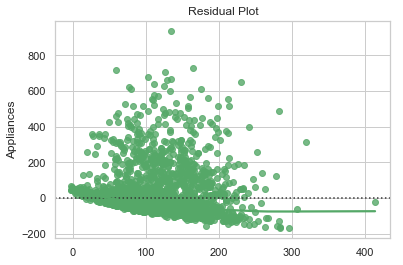

In [18]:
#check the assumption of residual homogenity
sns.set(style="whitegrid")
#residual plot
sns.residplot(predicted, y_test, lowess=True, color="g")
plt.title('Residual Plot')
plt.show()

From the residual plot, we can see that the residual are mainly located above zero which tell us the homogenity assumption of a regression model is violated. Ideally, the dots should be spread across the plot randomly. This may due to the skewed distribution of the response variables (Appliances).

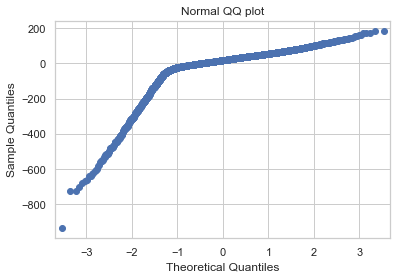

In [19]:
#check the assumption of residual normality
sm.qqplot(predicted-y_test)
plt.title('Normal QQ plot')
pylab.show()

We can see a significant kink in the normal quantile-quantile plot. And this means the normality assumption on the residuals is also violated. Ideally, we should have a line that is close to a straight line on this plot. Again, this may highly due to the skewness of the response variable. 

# Improving the model

In the coming section, based on the observation from our data exploration, we try to improve the regression model. 

There are two things need to be done:
- remove correlated variables
- transform the variables to fufil the linear regression assumption



In [20]:
#initialise the variables used in training the model
#keep the variables that are not correlated to each other
predictors = ['lights','T_out', 'Press_mm_hg', 'RH_out','Visibility', 'Tdewpoint','WeekStatus']
response = 'Appliances'

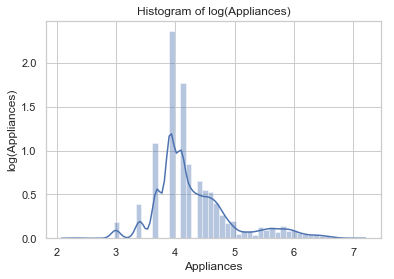

In [21]:
#check the distribution of the transformed response variable
sns.distplot(np.log(energy['Appliances']))
plt.title('Histogram of log(Appliances)')
plt.ylabel('log(Appliances)')
plt.show()

From the histogram above, the new response variables (log(appliances)) looks much less skewed then before the transformation and we will use this for our model building.

In [99]:
X = train.loc[:,predictors]
X['lights'] = np.log(X['lights']+0.1)
y = np.log(train[response])
model.fit(X=X,y=y)
print("y = exp{", model.coef_, "* x + ", model.intercept_,'}')

y = exp{ [ 0.08854812 -0.06035478 -0.00698727 -0.024298    0.00040261  0.07217239] * x +  11.7849364741 }


The model shows the multiplicative relation of the predictors and the reponse variable. 

For example, a unit increase in light will lead to 9% increase ($e^{0.089}*1 = 1.09$) to the appliances energy use.

And next, we evaluate the new model.

In [101]:
predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 0.371789531861
R^2: 0.145701540497


In [102]:
X_test = test.loc[:,predictors]
X_test['lights'] = np.log(X_test['lights']+0.1)
y_test = np.log(test[response])
predicted = model.predict(X_test)

In [103]:
print("The evaluation of the new model")
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

The evaluation of the new model
MSE: 0.35580686545
R^2: 0.147264052205


$R^2$ is 0.148 which means 14.8% of the data can be explained by this model. Although the explainatory power did not imporved, given that we only used 6 variables out of the 28, the model is imporved a lot.

Next, we check the assumption of the regression model.

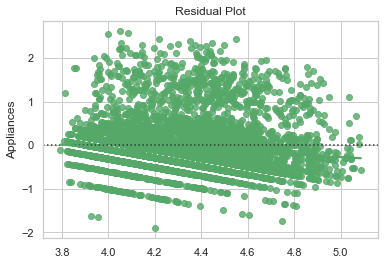

In [25]:
sns.set(style="whitegrid")
#residual plot
sns.residplot(predicted, y_test, lowess=True, color="g")
plt.title('Residual Plot')
plt.show()

The residual plot of the new model seems more random than the previous one. However, we can still observe unusual pattern below zero.

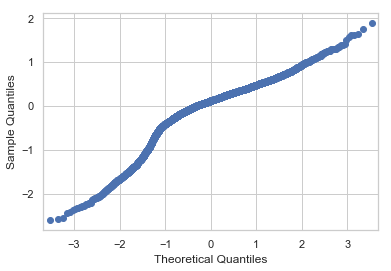

In [26]:
sm.qqplot(predicted-y_test)
pylab.show()

Similarly, the kink of the normal QQ plot is flatten, but the line is still not linear. We will further discuss the reason in the summary.

# Recursive Feature Estimation

In [27]:
#initialise the variables used in training the model
predictors = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM','WeekStatus']
response = 'Appliances'

In [28]:
#Run rfe on linear regression model
from sklearn.feature_selection import RFE

X = train[predictors]
y = np.log(train[response])

reg = linear_model.LinearRegression()
rfe = RFE(estimator=reg, n_features_to_select=14, step=1) # keep 14 variables

model = rfe.fit(X, y)

In [29]:
#THe inclusion of variables and their rank under RFE
pd.DataFrame({'Included':model.support_,'rank':model.ranking_},index=predictors)

,Included,rank
lights,True,1
T1,False,13
RH_1,True,1
T2,True,1
RH_2,True,1
T3,True,1
RH_3,True,1
T4,False,3
RH_4,False,11
T5,False,8


Interestingly, NSM which is ranked to be the most important elements in the paper come last in our result. 

This may result from serveral reasons:
- the alogrithm we used is linear regression whereas the paper use GBM, SVM and Random Forest.
- manipulation we did on the data, we have did a transformation to the data
- the scoring criteria is different

We should also note that there are variables we haven't include here such as the paper specify each day as a categorical variables whereas we only included Weekstatus instead.

In [30]:
X_test = test[predictors]
#X_test['lights'] = np.log(X_test['lights']+0.1)
y_test = np.log(test[response])
predicted = model.predict(X_test)

In [31]:
print("The evaluation of the full model")
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

The evaluation of the full model
MSE: 0.308325983798
R^2: 0.261057962747


$R^2$ is 0.26 which means 26.1% of the data can be explained by this model. This is an imporvement of our previous improved model.

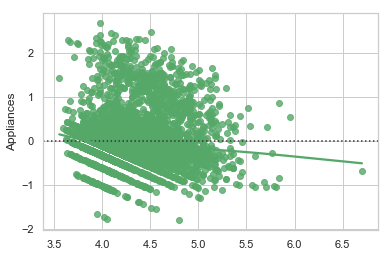

In [32]:
sns.set(style="whitegrid")
#residual plot
sns.residplot(predicted, y_test, lowess=True, color="g")

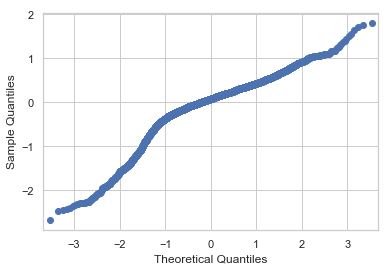

In [33]:
sm.qqplot(predicted-y_test)
pylab.show()

However, the residual plot still not random and the normal QQ plot is still not linear.

# Summary

The unrandom residual plots indicates the data did not include the features we needed to build a better model with linear regression. 
The non-linear normal QQ plot also suggest more transformation such as high order of polynomial may needed for a better result.

To improve the model, we can further explore other generalised linear model that has less assumption or other machine learing techniques rather than linear regression.

As the appliance energy shows certain patterns (low at 0-6am), another possible improvement is we can treat the data as time series or view the energy use per day instead of per 10 mins.

# Extension Analysis

In [119]:
#Preprocess the data grouping into date
train = pd.read_csv('Appliances-energy-prediction-data/training.csv')
test = pd.read_csv('Appliances-energy-prediction-data/testing.csv')
train.index = pd.to_datetime(train.date)
train = train.groupby([train.index.date]).sum()
test.index = pd.to_datetime(test.date)
test = test.groupby([test.index.date]).sum()
train.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM
2016-01-11,4190,880,667.810000,1493.690833,646.806667,1429.993333,645.110833,1469.608333,626.143333,1510.734167,...,1443.097500,189.000000,23528.216667,2856.000000,196.166667,1304.000000,134.566667,820.465066,820.465066,2374800
2016-01-12,8840,470,2209.368333,4968.143333,2122.598041,4817.016503,2199.156667,4941.986667,2172.425000,4898.588333,...,5020.571667,612.400000,81694.250000,9623.333333,637.833333,4057.666667,395.766667,2776.403904,2776.403904,4738800
2016-01-13,11570,630,2284.020000,5100.555833,2209.077476,5010.587351,2329.821667,5200.548333,2261.783333,5035.674167,...,5319.805000,590.216667,89824.733333,9848.666667,667.166667,3760.666667,256.616667,2860.289436,2860.289436,4991400
2016-01-14,17420,560,2203.542500,4579.457500,2134.583333,4395.596667,2246.159167,4676.978333,2019.066667,4670.996667,...,4903.790000,366.200000,80973.766667,9344.166667,680.666667,3805.666667,139.216667,2764.931657,2764.931657,4696800
2016-01-15,11290,450,2280.750000,3991.352500,2206.724264,3905.366359,2143.510000,4233.650000,1998.515617,4276.794475,...,4550.920000,261.116667,76942.033333,9059.333333,805.666667,4022.000000,82.983333,2568.797932,2568.797932,4213800


In [120]:
data = ['lights','T_out', 'Press_mm_hg', 'RH_out','Visibility', 'Tdewpoint']
target = 'Appliances'
X_train = train[data]
X_test = test[data]
y_train = train[target]
y_test = test[target]

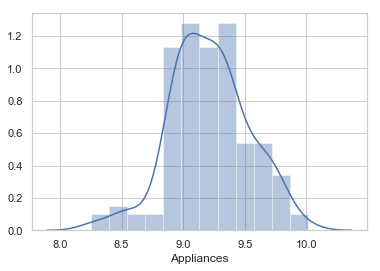

In [121]:
sns.distplot(np.log(train.Appliances))

The distribution of log(Appliances) is much normally distributed than the original analysis which better fufilling the assumption for linear regression.

In [122]:
#load packages for linear model and calculating R square
model = linear_model.LinearRegression()
from sklearn.metrics import r2_score,mean_squared_error
#initialise the variables used in training the model
data = ['lights','T_out', 'Press_mm_hg', 'RH_out','Visibility', 'Tdewpoint']
target = 'Appliances'

In [127]:
#train the full linear regression model
model.fit(X=X_train,y=y_train)
print("y = ", model.coef_, "* x + ", model.intercept_)

y =  [ 2.8856281   1.90634838  0.08113171  0.26171812 -0.50025771 -1.3853253 ] * x +  1622.19554459


In [126]:
#create prediction value from the test data
predicted = model.predict(X_train)
print("The evaluation of the new model")
print("MSE:", mean_squared_error(y_train, predicted))
print("R^2:", r2_score(y_train, predicted))

The evaluation of the new model
MSE: 10266664.7208
R^2: 0.103644819441


In [125]:
#create prediction value from the test data
predicted = model.predict(X_test)
print("The evaluation of the new model")
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

The evaluation of the new model
MSE: 2529481.06155
R^2: -0.524981290607


R^2 (0.103)  did not improved the model from the original analysis (0.148) this may because weekdays is being removed. The model showed poor predicting power (negative value). This may becasue the data predicting the future energy use is not included in the training data. A possible solution is using a time series model to fit a new model.